# 花哨的索引

在前面的小节中，我们看到了如何利用简单的索引值（如 arr[0]）、切片（如 arr[:5]）和布尔掩码（如 arr[arr > 0]）获得并修改部分数组。  
在这一节中，我们将介绍另外一种数组索引，也称作**花哨的索引（fancy indexing）**。  
花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。  
花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。

In [1]:
import numpy as np

## 1. 探索花哨的索引

花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。

In [2]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
[x[3], x[7], x[2]]  # 常规方式获取3个元素

[71, 86, 14]

In [4]:
ind = [3, 7, 4]
x[ind]  # 通过传递索引的单个列表或数组来获得同样的结果

array([71, 86, 60])

In [5]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]  # 利用花哨的索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致

array([[71, 86],
       [60, 20]])

In [6]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]  # 花哨的索引也对多个维度适用，和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列

array([ 2,  5, 11])

In [8]:
X[row[:, np.newaxis], col]  # 在花哨的索引中，索引值的配对遵循广播规则。因此当我们将一个列向量和一个行向量组合在一个索引中时，会得到一个二维的结果

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [9]:
row[:, np.newaxis] * col  # 这里特别需要记住的是，花哨的索引返回的值反映的是广播后的索引数组的形状，而不是被索引的数组的形状

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## 2. 组合索引

In [10]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [11]:
X[2, [2, 0, 1]]   # 将花哨的索引和简单的索引组合使用

array([10,  8,  9])

In [12]:
X[1:, [2, 0, 1]]  # 将花哨的索引和切片组合使用

array([[ 6,  4,  5],
       [10,  8,  9]])

In [13]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]  # 将花哨的索引和掩码组合使用

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 3. 示例：选择随机点

花哨的索引的一个常见用途是从一个矩阵中选择行的子集。  
例如我们有一个 `N×D` 的矩阵，表示在 `D` 个维度的 `N` 个点。以下是一个二维正态分布的点组成的数组：

In [14]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

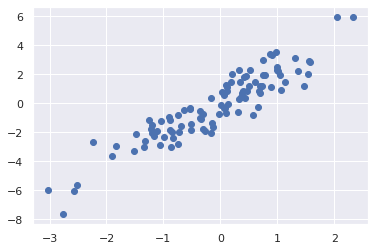

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置绘图风格

plt.scatter(X[:,0], X[:,1])

In [16]:
indices = np.random.choice(X.shape[0], 20, replace=False)  # 我们将利用花哨的索引随机选取 20 个点——选择 20 个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值
indices

array([13, 28, 62, 21, 24,  8, 80, 58, 72, 74, 44, 79, 69, 33,  5, 97, 23,
        1, 15, 42])

In [17]:
selection = X[indices]
selection.shape

(20, 2)

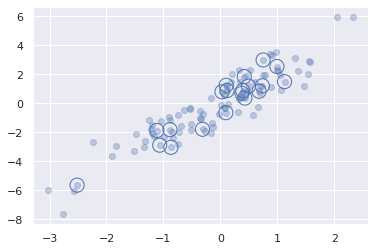

In [18]:
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(selection[:,0], selection[:,1], facecolor='none', edgecolor='b', s=200)

# 这种方法通常用于快速分割数据，即需要分割训练 / 测试数据集以验证统计模型时，以及在解答统计问题时的抽样方法中使用。

## 4. 用花哨的索引修改值

In [19]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])

x[i] = 99
print(x)

x[i] -= 10
print(x)

[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [20]:
x = np.zeros(10)
x[[0,0]] = [4, 6]  # 操作中重复的索引会导致一些出乎意料的结果产生，这里 x[0] = 4 被 x[0] = 6覆盖
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1  # 执行操作可以理解为，并行计算，依次赋值，所以产生的效果是重复的赋值，而不是累加的效果
x
# 书中的解释：
# 你可能期望 x[3] 的值为 2，x[4] 的值为 3，因为这是这些索引值重复的次数。但是为什么结果不同于我们的预想呢？
# 从概念的角度理解，这是因为 x[i] += 1 是 x[i] = x[i] + 1 的简写。x[i] + 1 计算后，这个结果被赋值给了 x 相应的索引值。
# 记住这个原理后，我们却发现数组并没有发生多次累加，而是发生了赋值，显然这不是我们希望的结果。

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [22]:
x = np.zeros(10)
np.add.at(x, i, 1)  # 如果想要实现上面的的“伪”累加效果，可以这样实现
print(x)

# at() 函数在这里对给定的操作、给定的索引（这里是 i）以及给定的值（这里是 1）执行的是就地操作。另一个可以实现该功能的类似方法是通用函数中的 reduceat() 函数。

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## 5. 示例：数据区间划分

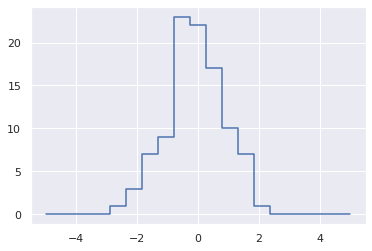

In [23]:
# 手动计算并绘制直方图
np.random.seed(42)
x = np.random.randn(100)

# 手动创建直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
i = np.searchsorted(bins, x)

# 为每个区间加上1
np.add.at(counts, i, 1)

# 画图
# plt.plot(bins, counts, linestyle='steps')  # linestyle supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.plot(bins, counts, drawstyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x7fa7ce690c18>])

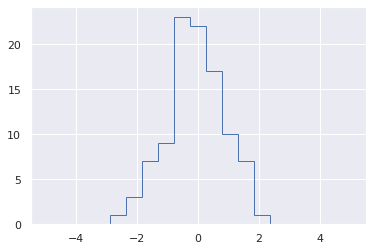

In [24]:
# 使用plt.hist()更简单的绘制直方图，无需手动计算
plt.hist(x, bins, histtype='step')